(array([253.99999892, 254.00000088, 254.00000131, ..., 254.00000635,
       253.99999851, 254.00000532]), 3.7703742350458924e-09, {'grad': array([0., 0., 0., ..., 0., 0., 0.]), 'task': 'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT', 'funcalls': 11, 'nit': 3, 'warnflag': 1})


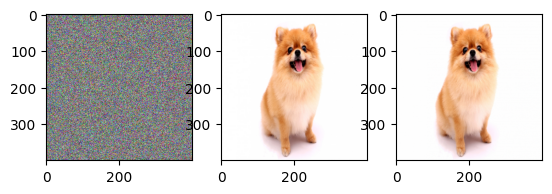

In [2]:
import tensorflow as tf
import numpy as np
import scipy.optimize as sopt
import matplotlib.pyplot as plt
from imageio import imread
from skimage import io
import cv2

img1 = tf.random.uniform([400,400] + [3], minval=0, maxval=255, dtype=tf.float32)

img2 = io.imread('https://img.freepik.com/premium-photo/pomeranian-dog-white-background_63176-471.jpg?w=900')
img2 = tf.cast(cv2.resize(img2, (400,400)), dtype=tf.float32)


fig, axs = plt.subplots(1,3)
axs[0].imshow(tf.cast(img1 , dtype=tf.uint8))
axs[1].imshow(tf.cast(img2 , dtype=tf.uint8))

img1 = tf.cast(img1, tf.float32)
img2 = tf.cast(img2, tf.float32)

img1 = tf.Variable(img1)



def model(x):
    x = tf.reshape(x, (400,400,3))
    return tf.reduce_sum(tf.square(x-tf.constant(img2, dtype=tf.float32)))

@tf.function
def val_and_grad(x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        loss = model(x)
    tf.clip_by_value(x, 0, 255)
    grad = tape.gradient(loss, x)
    return loss, grad

def func(x):
    return [vv.numpy().astype(np.float64)  for vv in val_and_grad(tf.constant(x, dtype=tf.float32)) ]

resdd= sopt.fmin_l_bfgs_b(func=func, x0 = img1, maxfun = 10)

print(resdd)
axs[2].imshow( tf.cast(tf.reshape(resdd[0], (400,400,3)) , dtype = tf.uint8))

In [14]:
resdd[2]

{'grad': array([-172.14315796, -125.74359131, -107.02728271, ..., -313.87994385,
        -269.79541016,  -80.21780396]),
 'task': 'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT',
 'funcalls': 9,
 'nit': 1,
 'warnflag': 1}